In [203]:
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio
from matplotlib.pyplot import figure
from scipy.stats import skew

step is 19  mean is  7.08191979975986  var is  7.938662994162083 mean meadian diff  0.031052889728789324
step is 16  mean is  7.133695956443847  var is  8.04701083202886 mean meadian diff  0.029797517346872863
step is 8  mean is  7.447603973076016  var is  8.19060767683128 mean meadian diff  0.015950002967359923
step is 7  mean is  7.456155562843941  var is  8.171897799378714 mean meadian diff  0.01825292911912116
step is 6  mean is  7.428967605415714  var is  8.011165447038891 mean meadian diff  0.022855233917238035
step is 5  mean is  7.426314954401404  var is  8.039316714659863 mean meadian diff  0.02174258903492682
step is 4  mean is  7.469179612712358  var is  8.20838354492629 mean meadian diff  0.011759486599476622
step is 3  mean is  7.360834289825832  var is  7.93412889866157 mean meadian diff  0.020891818378127633
step is 2  mean is  7.385441867018186  var is  8.005259776426396 mean meadian diff  0.021294380120113848
step is 1  mean is  7.4119976368535525  var is  8.2650654869

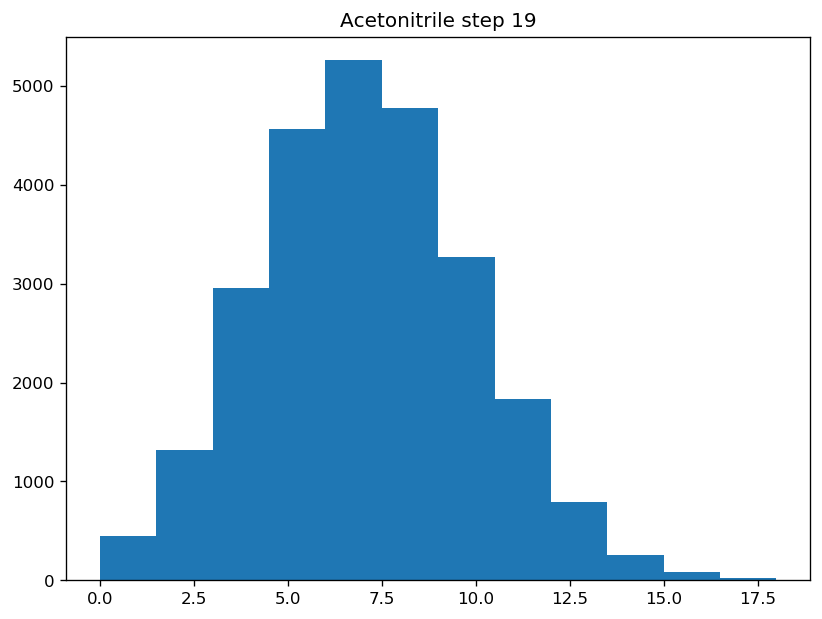

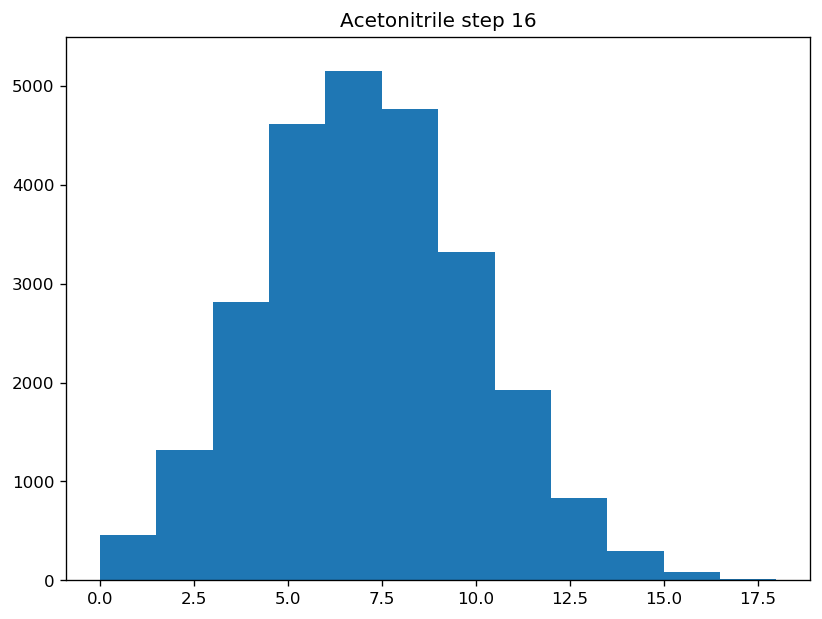

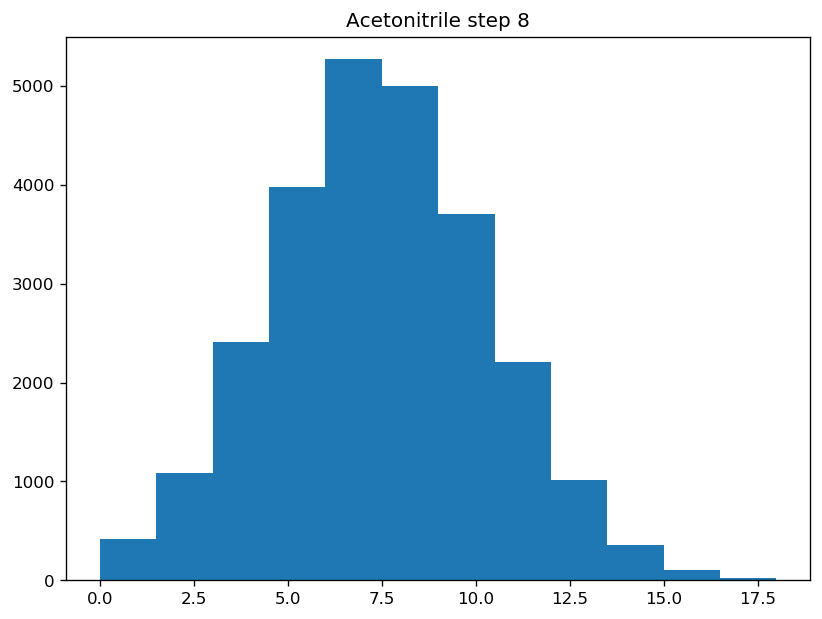

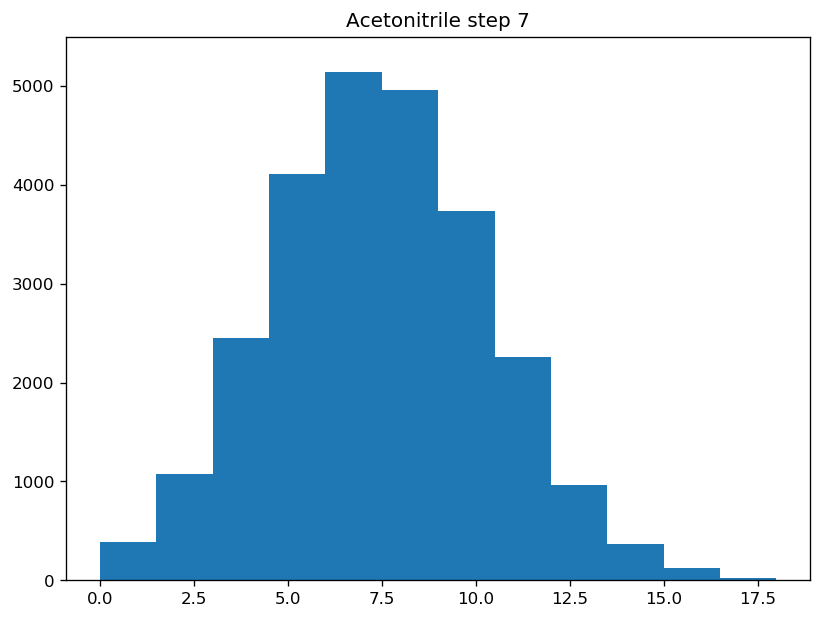

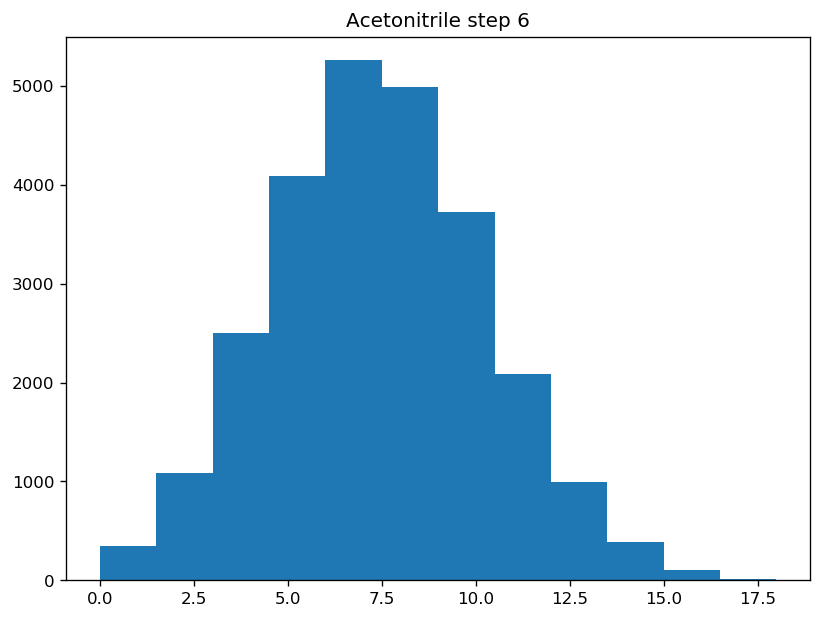

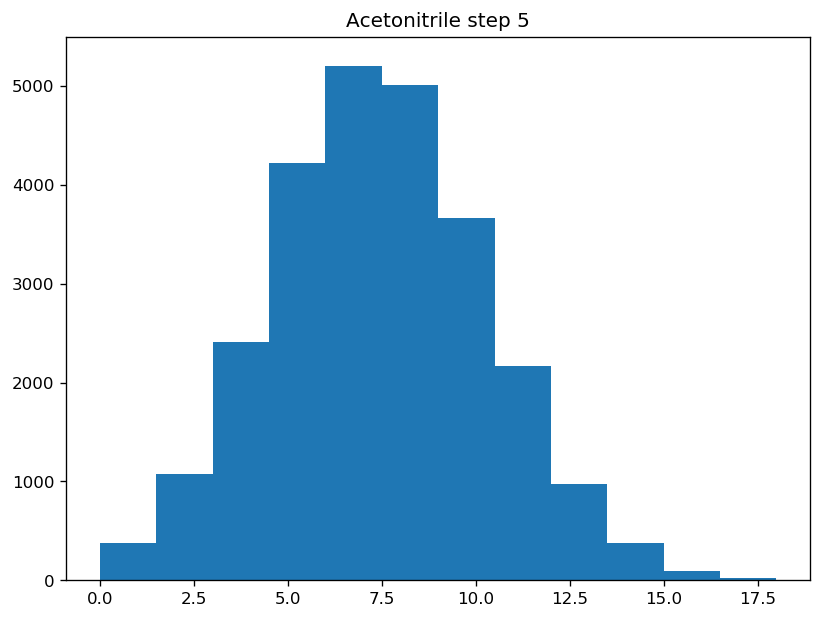

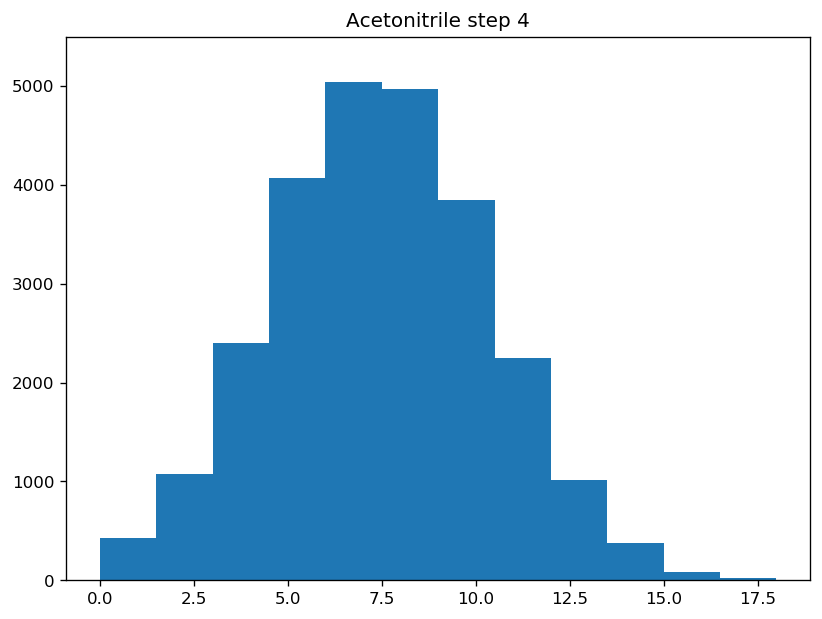

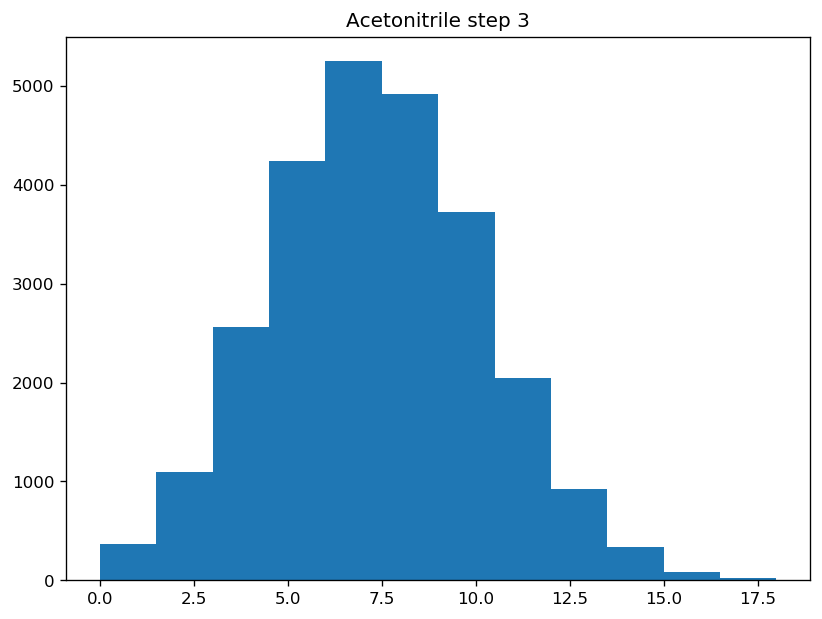

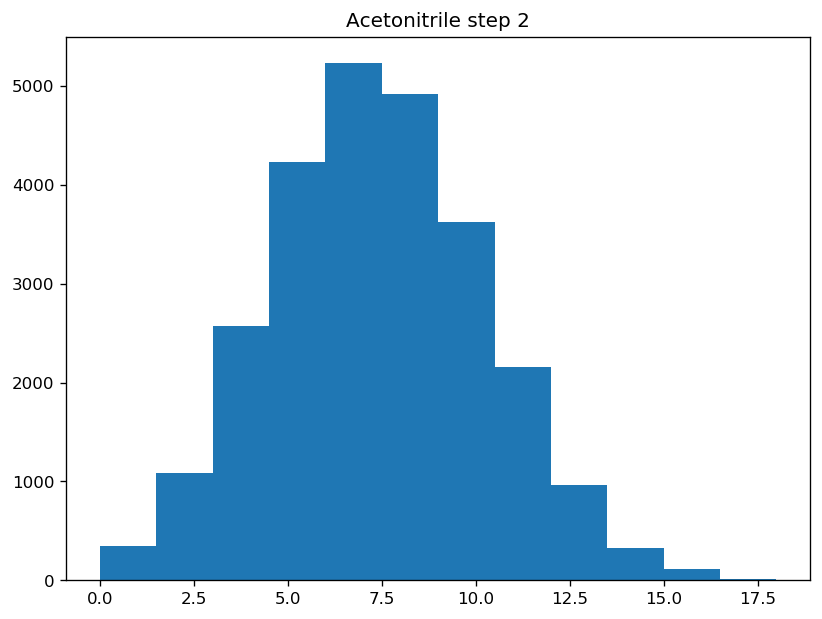

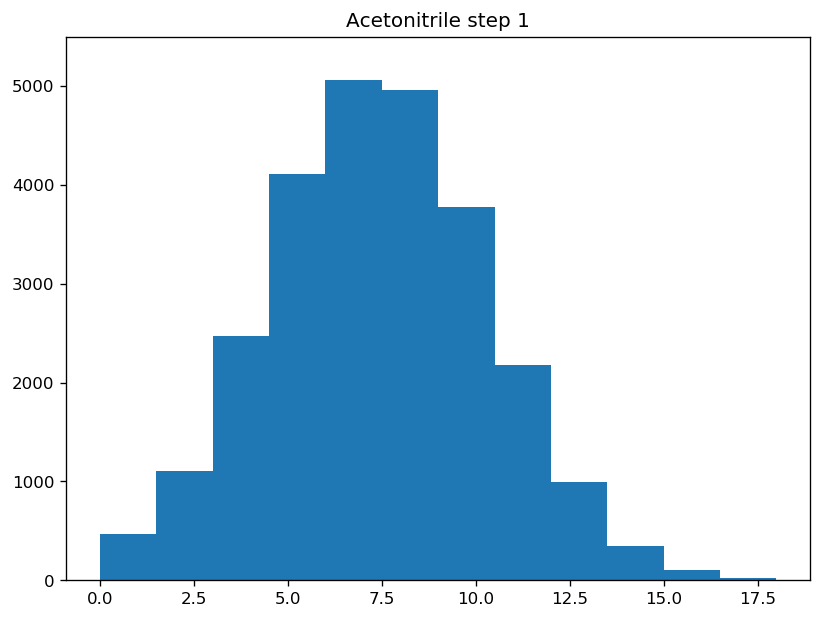

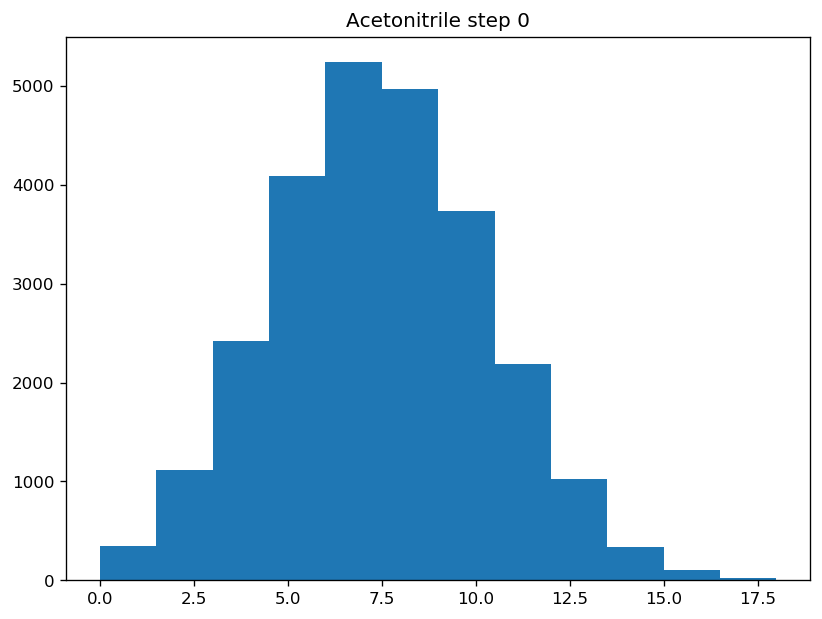

In [213]:
#folder where COP files are stored.  Must be in form {step}_{frame}.cop where step and frame are integers.
#
files = listdir('OPStuff') 
nmols = 3200
filessplit = []
bondOPs = []
mybins = [0,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15,16.5,18]
filenames = []
means = []
variance = []
medians = []
for fname in files:
    location = 'OPStuff/'+fname
    f = open(location,'r')
    orderparameters = []
    filessplit.append(fname.split('_'))
    for x in f:
        orderparameters.append(x)
    f.close()
    bondOPs.append(np.array(orderparameters[(10+nmols):(10+2*nmols)],dtype=float))

filessplit = np.asarray(filessplit)
uniques = np.unique(filessplit[:,0]).tolist()
newbondOPs = []
uniques = [int(x) for x in uniques]
uniques.sort(reverse=True)
for i in range(len(uniques)):
    holder = []
    for j in range(len(bondOPs)):
        if filessplit[j][0] == str(uniques[i]):
            holder.append(bondOPs[j].tolist())
    newbondOPs.append(np.asarray(holder).flatten())
    figure(figsize=(8,6),dpi=120)
    _ = plt.hist(np.asarray(holder).flatten(),bins=mybins)
    means.append(np.mean(holder))
    variance.append(np.var(holder))
    medians.append(np.median(holder))
    print('step is', uniques[i],' mean is ', np.mean(holder), " var is " ,np.var(holder),  "mean meadian diff ", (np.mean(holder) - np.median(holder))/np.sqrt(np.var(holder)))
    title = "Acetonitrile step " + str(uniques[i])
    plt.title(title)
    plt.ylim(bottom=0,top=5500)
    figname = "Figs/" + str(uniques[i]) + ".png"
    plt.savefig(figname, format='png')
    #plt.show()
    filenames.append(figname)
skewer = []
for i in range(len(newbondOPs)):
    skewer.append(skew(newbondOPs[i]))
    
images = []
kargs = { 'duration': 1 }
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('ACN.gif', images, **kargs)


In [214]:
print(skewer)

[0.20058342506199808, 0.17847486725684694, 0.105764253979401, 0.1322047826017125, 0.1515698676773576, 0.1360314376975592, 0.09169636184986334, 0.1448527708805405, 0.1538017408550908, 0.08752859377549084, 0.13197976909855424]
